## MMC - L1 - Kacper Marchlewicz - 310195

# Zadanie 1

Liniowy generator kongruentny generuje ciąg liczb o rozkładzie równomiernym. Został zaimplementowany w postaci poniższej klasy.  
* Inicjalizuje sie go hiperparametrami zgodnymi ze wzorami w poleceniu. 
* Funkcja *generate* służy do wygenerowania liczb dla pierwszej liczby (ziarna).
* Funkcja *save_to_file* zapisuje liczby w parach do pliku *.txt* zgodnie z podanym krokiem
* Funkcja *plot* rysuje wykres z pliku

In [7]:
from matplotlib import pyplot as plt
import numpy as np

class Generator:
    def __init__(self,a,m,c=0):
        self.a=a
        self.m=m
        self.c=c
        self.numbers = None
    
    def generate(self, seed, count):
        self.numbers = list()
        prev=seed
        self.numbers.append(prev)
        for i in range(count):
            x = (self.a*prev + self.c) % self.m
            self.numbers.append(x)
            prev = x
    
    def save_to_file(self, step=1):
        filename = f'numbers_step_{step}_a_{self.a}.txt'
        file = open(filename, "w")
        for i in range(len(self.numbers) - step):
            line = f'{self.numbers[i]} {self.numbers[i+step]}\n'
            file.write(line)
        file.close()

    def plot(self, step=1):
        filename = f'numbers_step_{step}_a_{self.a}.txt'
        x, x_n = np.loadtxt(filename, unpack=True)
        plt.figure()
        plt.plot(x, x_n, '.') 
        plt.grid(linestyle=':')
        plt.xlabel('x_n')
        plt.ylabel(f'x_n+{step}')
        plt.title(f'Wykres rozproszenia: krok={step}, a={self.a}')
        plt.show()

Dla pierwszego wariantu generatora
* m= 2^13 -1
* a = 17
Wygenerowano 2500 liczb i otrzymano następującą strukturę przestrzenną z krokiem równym 1:

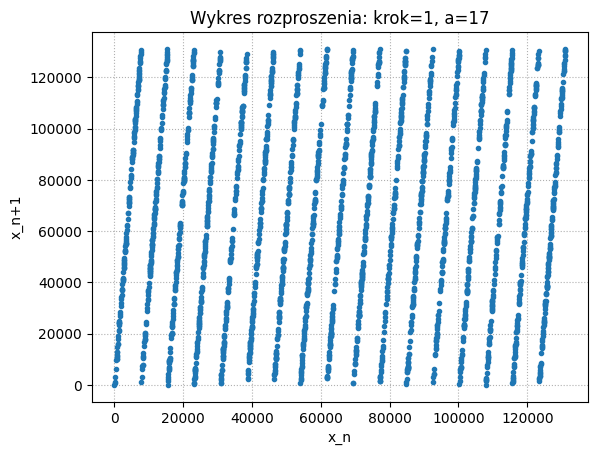

In [8]:
generator1 = Generator(a=17, m=pow(2,17)-1, c=0)
generator1.generate(seed=3,count=2500)

generator1.save_to_file(step=1)
generator1.plot(step=1)

Następnie powtórzono to dla wariantu generatora z *a=85*:

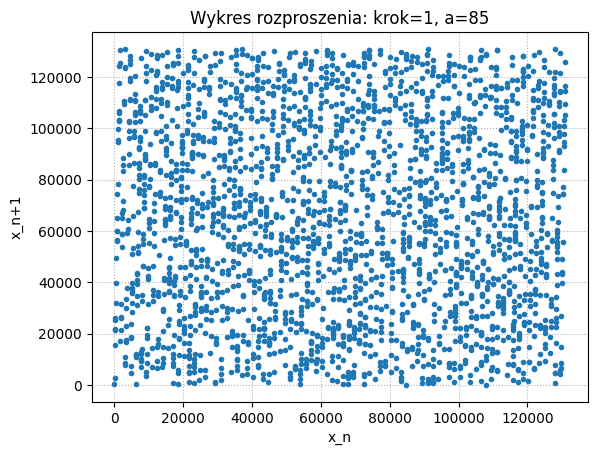

In [9]:
generator2 = Generator(a=85, m=pow(2,17)-1, c=0)
generator2.generate(seed=3,count=2500)

generator2.save_to_file(step=1)
generator2.plot(step=1)


Dla obu generatorów narysowano struktury przestrzenne z krokiem równym 2:

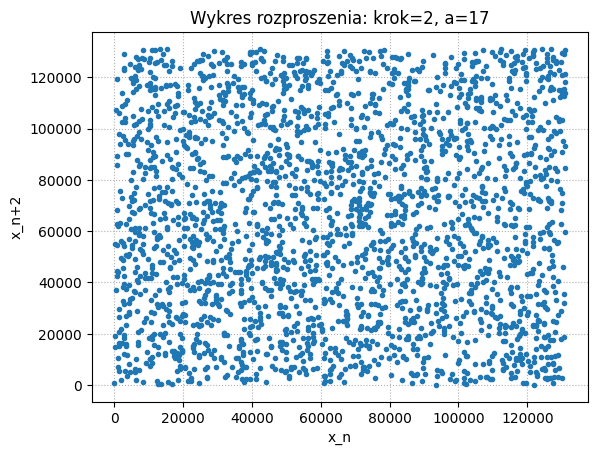

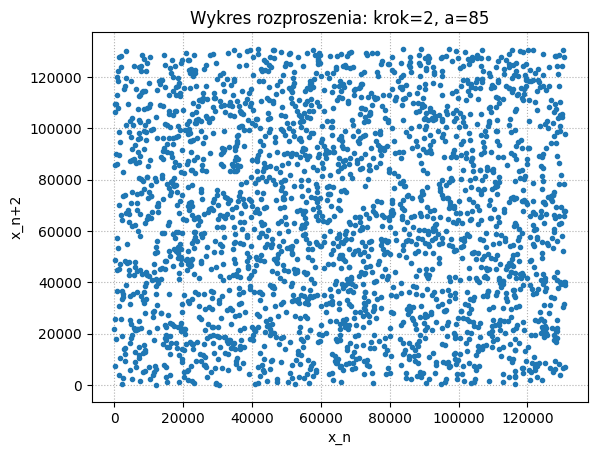

In [10]:
generator1.save_to_file(step=2)
generator1.plot(step=2)

generator2.save_to_file(step=2)
generator2.plot(step=2)

Analizując wykresy dla korku równego 1 można stwierdzić, że lepszym generatorem jest wariant z *a=85*, gdyż liczby są równomiernie rozłożone w przestrzeni. Na rozkładzie generatora z *a=17* pojawiają się linie, wzorce, co świadczy o słabej jakości. Mimo to dla wariantu z *a=85* nadal można dostrzec wzorce na rozkładzie.  Na podstawie eksperymentów można stwierdzić, że oba generatory nie są za dobre.


# Zadanie 2
W tym zadaniu należy zaimplementować generator wykorzystujący algorytm Wichmanna i Hilla. Struktura klasy jest praktycznie taka sama jak generatora w poprzednim zadaniu.
* Funkcja *generate* generuje listę liczb dla podanego ziarna zgodnie ze wzorami
* Funkcja *save_to_file* zapisuje liczby w parach do pliku *.txt* zgodnie z podanym krokiem
* Funkcja *plot* rysuje wykres z pliku

In [11]:
class GeneratorWH:
    def __init__(self):
        self.x=None
        self.y=None
        self.z=None
        self.numbers = None
    
    def generate(self, seed, count):
        self.x = list()
        self.y = list()
        self.z = list()
        self.numbers = list()
        prev_x=seed[0]
        prev_y=seed[1]
        prev_z=seed[2]
        self.x.append(prev_x)
        self.y.append(prev_y)
        self.z.append(prev_z)
        for i in range(count):
            x = 171*prev_x % 30269
            y = 172*prev_y % 30307
            z = 170*prev_z % 30323
            k = (x/30269 + y/30307 + z/30323) % 1
            prev_x=x
            prev_y=y
            prev_z=z
            self.numbers.append(k)
            self.x.append(x)
            self.y.append(y)
            self.z.append(z)
    
    def save_to_file(self, step=1):
        filename = f'wh_numbers_step_{step}.txt'
        file = open(filename, "w")
        for i in range(len(self.numbers) - step):
            line = f'{self.numbers[i]} {self.numbers[i+step]}\n'
            file.write(line)
        file.close()

    def plot(self, step=1):
        filename = f'wh_numbers_step_{step}.txt'
        k, k_n = np.loadtxt(filename, unpack=True)
        plt.figure()
        plt.plot(k, k_n, '.') 
        plt.grid(linestyle=':')
        plt.xlabel('k_n')
        plt.ylabel(f'k_n+{step}')
        plt.title(f'Wykres rozproszenia: krok={step}')
        plt.show()

Narysowano Strukturę przestrzenną dla korku równego 1 oraz 2:

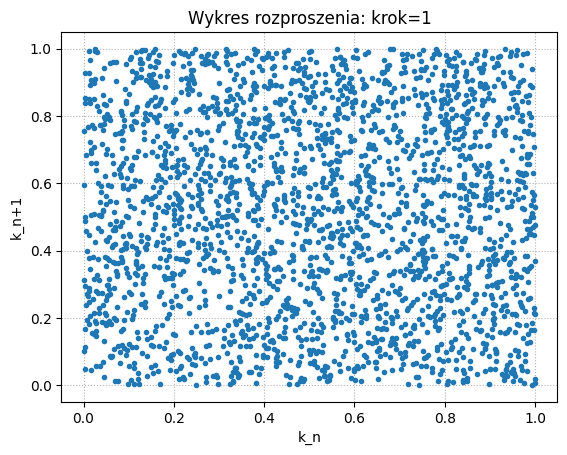

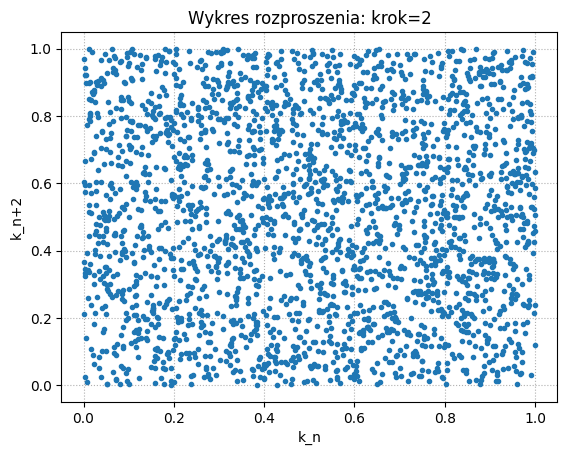

In [12]:
generatorwh1 = GeneratorWH()
generatorwh1.generate(seed=[3,3,3],count=2500)

generatorwh1.save_to_file(step=1)
generatorwh1.plot(step=1)

generatorwh1.save_to_file(step=2)
generatorwh1.plot(step=2)

Dla generatora wykorzystującego algorytm Wichmanna i Hilla na strukturze przestrzennej par nie widać już żadnych układów ani wzorców. Można stwierdzić że generator ten jest dośc dobrym generatorem liczb losowych, znacznie lepszym od tych badanych w poprzednim zadaniu.